# Final Project PIC 16A

By: Jessica Hanna and Karen Yi

## Group Contributions Statement
Briefly describe which group members contributed to which parts of the project (parts listed below).

“Both of us wrote the data import, cleaning, exploratory analysis, and feature selection, and the neural network model. Karen completed the logistic regression model. Jessica completed the random forest model. We all checked each other’s work and made revisions to code and writing.”

## Data import and cleaning 

In [327]:
# general imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import datetime as dt
import seaborn as sns

In [328]:
# read in dataset from online repository
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

# split dataset into train and test
train,test = train_test_split(penguins, test_size = .2,random_state = 0)

# check if split was done correctly 
print(len(train),len(test))
print(train.head())

275 69
    studyName  Sample Number                                    Species  \
49    PAL0708             50        Adelie Penguin (Pygoscelis adeliae)   
310   PAL0910             91          Gentoo penguin (Pygoscelis papua)   
325   PAL0910            106          Gentoo penguin (Pygoscelis papua)   
122   PAL0910            123        Adelie Penguin (Pygoscelis adeliae)   
167   PAL0708             16  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
49   Anvers      Dream  Adult, 1 Egg Stage         N30A2               Yes   
310  Anvers     Biscoe  Adult, 1 Egg Stage         N15A1               Yes   
325  Anvers     Biscoe  Adult, 1 Egg Stage         N24A2               Yes   
122  Anvers  Torgersen  Adult, 1 Egg Stage         N67A1               Yes   
167  Anvers      Dream  Adult, 1 Egg Stage         N70A2               Yes   

     Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)

In [329]:
def clean_penguins(df):
    """
    Clean the data by dropping missings and recoding variables.
    """
    np.random.seed(1234)
    
    # recode binary variable(s)
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Island'] = le.fit_transform(df['Island'])
    df['Clutch Completion'] = le.fit_transform(df['Clutch Completion'])

    # recode species
    df['Species'] = df['Species'].str.split().str.get(0)
    
    # recode date egg laid
    # df['Date Egg']=pd.to_datetime(df['Date Egg'])
    # df['Date Egg 2']=df['Date Egg'] - dt.datetime(2007,11,11)
    # df['Date Egg 2']=df['Date Egg 2'].dt.days

    df = df[df['Sex'] != 0]
    df = df[df['Sex'] != 3]
    
    return(df)

Note: We know we need to split the data and recode it but we're going to do it after we graph the bar plots below, so that our graphs are labeled with strings.

## Exploratory Analysis
Compute summary statistics and construct visualizations about the relationships between variables. 

1. Your exploratory analysis should include at least 3 figures and at least 1 displayed table. (2-person groups need include only 2 figures and 1 table.)

2. You must demonstrate three (2) different types of figures, such as scatterplots, histograms, boxplots, and barcharts. At least one figure must contain multiple axes. 
    1. For each figure, you should explain how it illustrates a point which supports your modeling decisions below. Even if you ultimately select your features using some method that is unrelated to the figures, your discussion should give your reader an intuitive interpretation about why those features might be helpful or informative. 
    
All figures and tables should be polished and legible, with clear legends and axis-labels. 

In [330]:
# a little bit of mini-processing to make the graphs labeled aesthetically
train['Species'] = train['Species'].str.split().str.get(0)

C:\Users\notka\AppData\Local\Temp/ipykernel_6728/194972795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Species'] = train['Species'].str.split().str.get(0)


In [331]:
# compute summary statistics
pd.set_option("display.max_rows", None, "display.max_columns", None)
train.groupby(['Species']).aggregate([len,np.mean,np.std,np.min,np.max]).round(2)

Sample Number                         Culmen Length (mm)         \
                    len   mean    std amin amax                len   mean   
Species                                                                     
Adelie              118  75.92  44.63    1  152                118  39.04   
Chinstrap            58  32.59  19.52    1   68                 58  48.55   
Gentoo               99  65.39  36.18    1  123                 99  47.60   

                            Culmen Depth (mm)                           \
            std  amin  amax               len   mean   std  amin  amax   
Species                                                                  
Adelie     2.66  33.1  46.0               118  18.47  1.21  16.1  21.5   
Chinstrap  3.23  40.9  58.0                58  18.30  1.09  16.4  20.8   
Gentoo     3.22  40.9  59.6                99  14.99  1.02  13.1  17.3   

          Flipper Length (mm)                             Body Mass (g)  \
                          len    mean   std   amin   amax           len   
Species                                                                   
Adelie                    118  190.45  6.71  172.0  210.0           118   
Chinstrap                  58  194.72  6.62  178.0  210.0            58   
Gentoo                     99  217.58  6.75  203.0  231.0            99   

                                           Delta 15 N (o/oo)              \
              mean     std    amin    amax               len  mean   std   
Species                                                                    
Adelie     3729.49  460.66  2850.0  4775.0               118  8.89  0.43   
Chinstrap  3700.86  355.65  2700.0  4500.0                58  9.34  0.38   
Gentoo     5075.26  489.42  4150.0  6300.0                99  8.27  0.26   

                       Delta 13 C (o/oo)                             
           amin   amax               len   mean   std   amin   amax  
Species                                                              
Adelie     7.70   9.80               118 -25.75  0.61 -26.79 -23.90  
Chinstrap  8.47  10.03                58 -24.55  0.22 -25.15 -23.89  
Gentoo     7.63   8.83                99 -26.23  0.52 -27.02 -25.00

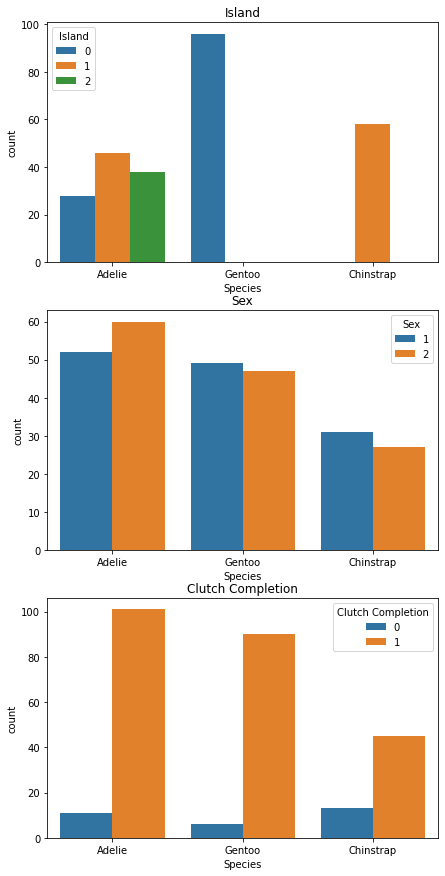

In [334]:
# create a subset of qualitative variables
cols = ["Island", "Sex", "Clutch Completion" ]
fig, ax = plt.subplots(len(cols), 1, figsize = (7, 15))

# create bar plots for each variable of interest
for i in range(len(cols)):
    fgrid=sns.countplot(data=train,ax = ax[i],  
                        x = "Species" ,
                        hue = train[cols[i]]).set(title = cols[i])

The above graphs show that the species are distributed unevenly across the islands, making this a good candidate for future modeling features. Furthermore, all species have about the same number of each sex, but we see that Adelie penguins have a larger population than the other species, and the Chinstrap species is the smallest in terms of population size. Chinstrap penguins appear to complete proportionally less clutches compared to the other species; Gentoo and Adelie have similar patterns of clutch completion. We can potentially use these species-specific data patterns, displayed in our bar graphs, to our advantage to differentiate individual penguins on the basis of species.

Now we are ready to clean and split our data.

In [335]:
# clean training data (testing data cleaned later)
train = clean_penguins(train)

In [336]:
# split training data into X and y
X_train = train.drop(['Species'], axis = 1)
y_train = train['Species']

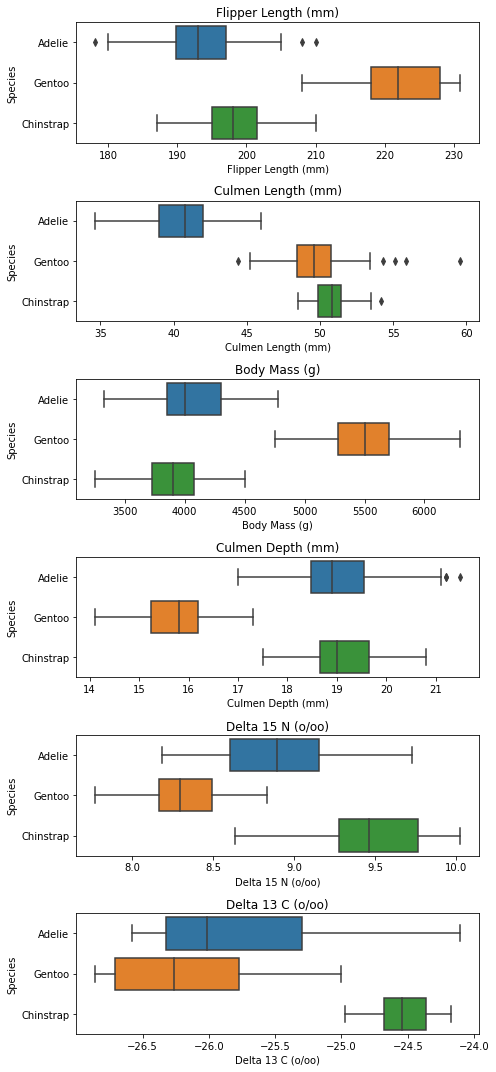

In [338]:
import seaborn as sns

# create a subset of quantitative columns to explore
cols = ["Flipper Length (mm)", "Culmen Length (mm)", "Body Mass (g)", 
        "Culmen Depth (mm)", "Delta 15 N (o/oo)","Delta 13 C (o/oo)"]

# create a figure with X number of subplots (to match the number of variables to explore)
fig, ax = plt.subplots(len(cols), 1, figsize = (7, 15))

# plot in each subplot
for i in range(len(cols)):
    # create seaborn boxplot for each variable
    # each boxplot is further split by species, to view how the variable predicts species
    fgrid=sns.boxplot(data=train,ax = ax[i],  
                    x=train[cols[i]],
                    y="Species").set(title = cols[i])

# formatting
plt.tight_layout()

The above graphs show that Gentoo penguins are distinguishable from the other species by their flipper length, culmen depth, and body mass, while Adelie penguins are distinguishable by their culmen length. It is difficult to use the above variables to distinguish Chinstrap species from the other species, as they often overlap on these measures and don't stand out with differences from other species. 

Two measures that could be used to distinguish Chinstrap and Gentoo penguins, but not Adelie penguins, are the chemical measures (Delta 15 N and Delta 13 C). The variation in these measures between species will be helpful for use in machine-learning models to decide which species each individual belongs to and what variables are the most effective in determining specific species.

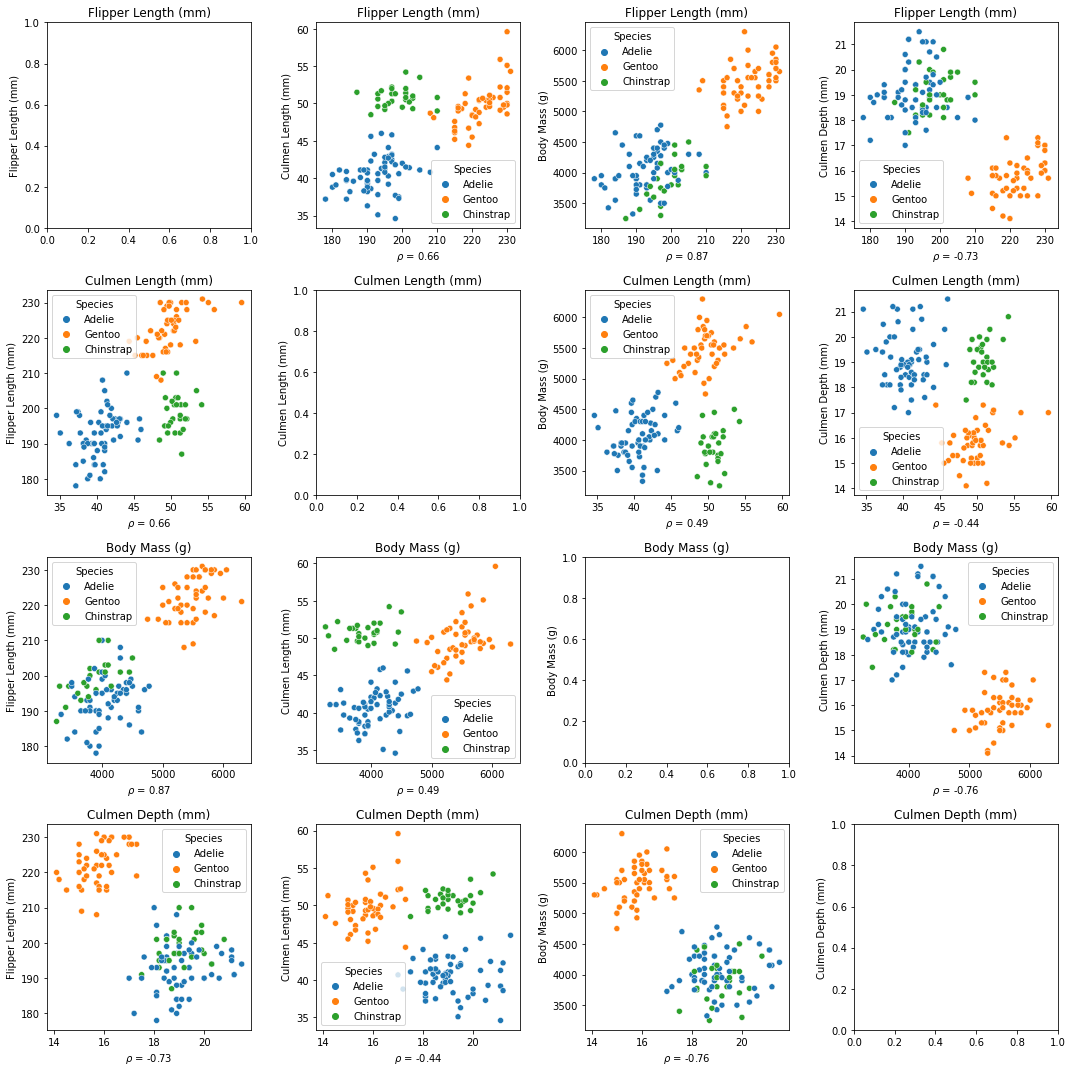

In [339]:
import numpy as np
import pandas as pd

def scatterplot_matrix(cols, figsize):
    """
    Creates a scatterplot matrix where there is a separate scatterplot for each 
    possible pair of variables(specific column x specific column). 
    
    Parameters
    ----------
    cols: list of strings, each of which are the name of one of 
    the columns from the pandas data frame
    figsize: size of the figure
    
    """
    #Gets the length of the columns
    col_len = len(cols)
    
    #Creates figure (number of subplots according to amount of columns)
    fig, ax = plt.subplots(col_len, col_len, figsize = figsize)
    
    #For every combination of column x column...
    for i in range(col_len):
        for j in range(col_len):
            
            #Titles every subplot in the scatterplot matrix for the 
            #specific column against column combination
            ax[i][j].set(title = cols[i], ylabel = cols[j])
            
            #Only plot data for subplots where the variable isn't against itself 
            #(leaves the diagonal empty)
            if i != j: 
                fgrid=sns.scatterplot(data=train,ax = ax[i][j],  
                    x = train[cols[i]] , y = train[cols[j]],
                  hue = "Species")
                
                #Computes the correlation coefficient between two or more variables.
                #Uses it to add captions to each panel of the plot giving the correlation coefficient
                #between the plotted variables
                P = np.corrcoef(train[cols[i]], train[cols[j]])
                corrCo = P[0,1]
                ax[i][j].set(xlabel = r"$\rho$ = " + str(np.round(corrCo, 2)))
    plt.tight_layout()
    
cols = ["Flipper Length (mm)", "Culmen Length (mm)", "Body Mass (g)", "Culmen Depth (mm)" ]
scatterplot_matrix(cols,figsize = (15,15))

The matrix scatter plot above shows us how much different variables correlate with each other across different species and allows us to determine which variables might correlate too much, allowing us to determine what might overfit our model. Variables that correlate too much will be excluded from our data analysis.  

The only variables that appear to be of concern are Body Mass and Flipper Length, which are highly correlated at r=.87; we won't use those together in any model. Other variables are not strongly correlated and thus would inform our data analyses.

## Feature Selection
Your models in the next section will use one qualitative feature (like Island or Sex) and two quantitative features (like Culmen Length or Body Mass). You should spend one section in which you perform an analysis to choose these features, and justify your choice. 

Your approach can be based on your exploratory data analysis; automated feature selection; or any other method – but you must be prepared to justify and write about your proposal. 

You are permitted to use different combinations of features for each of your three models (below). In this case, you should use the Feature Selection section to explain and illustrate your approach for a single model, which you can then repeat (without extensive explanation) for the other two models. Please remember that repetitive code should be wrapped in functions.

In [340]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import itertools

cols=np.array(["Flipper Length (mm)", "Culmen Length (mm)", "Body Mass (g)", 
               "Culmen Depth (mm)","Sex","Island","Clutch Completion"])

def check_column_score(cols,mod):
    """
    Train and evaluate the model via cross-validation on the columns with selected indices
    
    Each time this function runs, we are trying to predict Species from a combination of variables in array `cols`
    that always leaves out 1 variable, variable i, from the combination.
    
    We're trying to figure out which variable is most important: if we leave out a variable and the CV score is low,
    then that variable is really important.
    
    parameter cols: columns to train on, leaving out 1 column at a time from the full set
    parameter mod: model to train
    """
    return cross_val_score(mod,X_train[cols],y_train, cv=5).mean()

def feature_check(mod):
    """
    Check the performance of a user-specified model, using
    each combination of X variables in predicting Species.
    
    parameter mod: model to train
    """
    
    # message for what model is being trained
    print("using model: " + str(mod).split("(")[0])
    
    for i in range(len(cols)):
        # message for what columns are being omitted
        print("leaving out column: " + str(cols[i]))
        # performance when specific column is not used in the model
        print("CV score is " + str(np.round(check_column_score(cols[np.arange(len(cols)) != i],mod),3))) 

In [341]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# suppress convergence warnings only to make output clearer in the following sections
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

We are now going to examine which variables, when left out, produce the lowest CV scores. Low CV scores indicate that the model suffers without these variables.

In [ ]:
#neural network model
MLP=MLPClassifier(solver='lbfgs',
                 alpha=1e-5,
                 hidden_layer_sizes=(100,100, 100,100),
                 random_state = 0,
                 max_iter=1000)

feature_check(MLP)

The best quantitative variables for neural networks appear to be Flipper Length and Culmen Length.
The best qualitative variable is Island.

In [ ]:
#logistic regression model
LR=LogisticRegression(max_iter=1000)

feature_check(LR)

The best quantitative variables for logistic regression appear to be Culmen Length and Culmen Depth.
The best qualitative variable is Island.

In [ ]:
#random forest classifier model
RF=RandomForestClassifier()

feature_check(RF)

The best quantitative variables for random forest appear to be Flipper Length and Culmen Length.
The best qualitative variable is Island.

## Modeling
Deploy at least three machine learning models and evaluate their performance. You can use any three machine learning models from Scikit Learn, **except decision trees.** For each model, do the following: 
1. *Cross-validation* to choose complexity parameters
2. *Evaluation* on unseen testing data, including a confusion matrix. (Your confusion matrix should be evaluated only on the test set. Not on the training set.)
3. *Visualization* of decision regions for the model, with one plot corresponding to each value of the qualitative variable. You are not permitted to use the mlxtend package to construct your decision regions. Your colors must be consistent between your decision region plots. You must also provide a readable legend and correct axis labels.
4. *Discussion* of the mistakes made by each model. Your discussion should give intuition for why the model fails in certain cases, using the decision regions to illustrate your explanation.

__

Models
1. Neural network
2. Logistic regression
3. Random forests

In [342]:
# general imports and preprocessing
from sklearn.metrics import confusion_matrix

test = clean_penguins(test)
print(test.shape)
X_test = test.drop(['Species'], axis = 1)
y_test = test['Species']

le=preprocessing.LabelEncoder()
y_test=le.fit_transform(y_test)

# X_test = X_test.dropna(how='all',axis=0)
# y_test = y_test.dropna(how='all',axis=0)

(36, 17)


C:\Users\notka\AppData\Local\Temp/ipykernel_6728/4269571266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df['Sex'])
C:\Users\notka\AppData\Local\Temp/ipykernel_6728/4269571266.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Island'] = le.fit_transform(df['Island'])
C:\Users\notka\AppData\Local\Temp/ipykernel_6728/4269571266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [343]:
# dictionary for islands
islands = {
    0: "Biscoe",
    1: "Dream",
    2: "Torgersen"
}

In [351]:
# custom functions

def confusion(m,X,y):
    m.fit(X,y)
    p=m.predict(X)

    c=confusion_matrix(y,p)

    #df = pd.DataFrame({'y':y,'p':p})
    #df = pd.concat((df,X),axis=1)
    df=X.copy()
    df['y']=y
    df['p']=p
    
    recode = {
        0: "Adelie",
        1: "Chinstrap",
        2: "Gentoo"
    }
    
    df['y']=df['y'].map(recode)
    df['p']=df['p'].map(recode)
    
    print(df[df['y']!=df['p']])
    print(c)

def plot_regions(data,cols,m):
    """
    Plot color-coded decision regions (predictions) against actual values for a
    user-specified model and dataset.
    
    parameter data: grouped dataset
    parameter cols: X data
    parameter m: fitted model
    """
    
    # define variables
    x0 = cols[0] # x axis on final graph
    x1 = cols[1] # y axis on final graph
    isl = data['Island'].mode()[0] # island is constant for this graph
    y = data['Species'] # correct (actual) data labels

    ## Step 1: Create a 2D map of predicted data
   
    # create a matrix of data to predict off of
    grid_x=np.linspace(data[x0].min(),data[x0].max(),501) 
    grid_y=np.linspace(data[x1].min(),data[x1].max(),501) 
    xx,yy=np.meshgrid(grid_x,grid_y)

    # format the matrix: these are our first 2 arguments to the model
    XX=xx.ravel()
    YY=yy.ravel()
    
    # the 3rd argument ZZ should be constant, because we are plotting 
    # 1 island at a time
    ZZ=np.ones(XX.shape) * isl

    # predict data using the model and reshape to correct dimensions
    pred=m.predict(np.c_[XX,YY,ZZ]).reshape(xx.shape)

    ## Step 2: Plot decision regions
    
    # initialize figure
    fig,ax=plt.subplots(1)
    
    # plot regions: xx and yy create a rectangular grid
    # pred assigns values to each position in the grid according to 
    # model predictions
    ax.contourf(xx,yy,pred,cmap="jet",alpha=.2, norm=plt.Normalize(vmin=0,vmax=2))

    ## Step 3: Plot observed data and color-code by true label
    
    # split data per species
    ad = data[y=="Adelie"]
    ge = data[y=="Gentoo"]
    ch = data[y=="Chinstrap"]
    
    # define simple lambda function for plotting
    scatterplot = lambda df,c,lab : ax.scatter(df[x0],df[x1],c=c,label=lab)
    
    # plot data per species
    scatterplot(ad,"blue","Adelie")
    scatterplot(ge,"red","Gentoo")
    scatterplot(ch,"green","Chinstrap")
    
    ## Step 4: Formatting
    
    # label axes and graph
    ax.set(xlabel=str(x0),
           ylabel=str(x1),
           title=islands[isl])
    
    # show legend
    ax.legend()
    
def print_dict(dictionary):
    """
    Print the values of a dictionary
    """
    for key,value in dictionary.items():
        print(key,":\t",value)  

#### Neural Networks

In [345]:
# For neural network, we found these variables to be the most helpful in predicting species.
nncols = ["Flipper Length (mm)","Culmen Length (mm)","Island"]

In [ ]:
## Cross validation

hiddenLayerDict = {}

# Now we need to fine-tune the complexity parameter
# found that a value of 80 is best for hidden-layer size
for i in range(5,15):
    hls=10*i
    MLP=MLPClassifier(solver='lbfgs',
                 alpha=1e-5,
                 hidden_layer_sizes=(hls,hls,hls,hls), 
                 random_state = 0)
    hiddenLayerDict[hls] = check_column_score(nncols,MLP)
    
print_dict(hiddenLayerDict)

In [352]:
## Evaluation

# create the best MLP model using above parameters
best_MLP=MLPClassifier(solver='lbfgs',
                 alpha=1e-5,
                 hidden_layer_sizes=(80,80,80,80), random_state = 0)
best_MLP.fit(X_test[nncols],y_test)

# confusion matrix
confusion(best_MLP,X_test[nncols],y_test)

     Flipper Length (mm)  Culmen Length (mm)  Island          y       p
141                187.0                40.6       1     Adelie  Gentoo
281                221.0                46.2       0     Gentoo  Adelie
199                212.0                49.0       1  Chinstrap  Gentoo
275                220.0                45.0       0     Gentoo  Adelie
26                 183.0                40.6       0     Adelie  Gentoo
55                 191.0                41.4       0     Adelie  Gentoo
65                 192.0                41.6       0     Adelie  Gentoo
63                 192.0                41.1       0     Adelie  Gentoo
299                223.0                45.2       0     Gentoo  Adelie
246                216.0                44.5       0     Gentoo  Adelie
291                221.0                46.4       0     Gentoo  Adelie
[[ 8  0  5]
 [ 0  6  1]
 [ 5  0 11]]


""


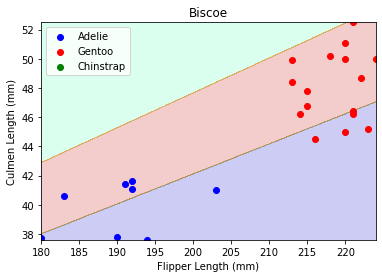

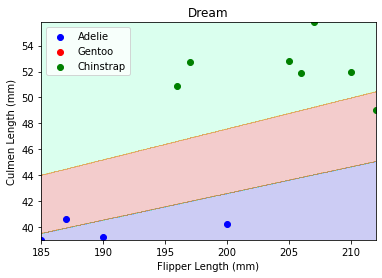

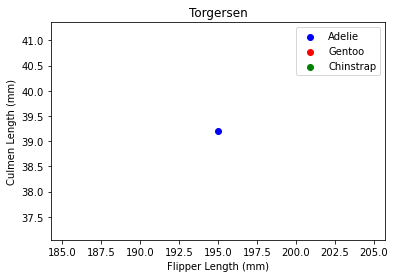

In [348]:
## Plot decision regions
test.groupby(['Island']).apply(plot_regions,nncols,best_MLP)

#### Discussion

This model made some mistakes when deployed on the testing data. We see this in the Biscoe island data, where some Adelie penguins were categorized as Gentoo and vice versa. A similar situation is visible on Dream island, to a smaller extent.

Upon examination of the decision-region plot, it appears that the neural network draws rectilinear decision regions, which makes it easy for points to be miscategorized if the clusters are overlapping on a diagonal axis. 

We believe this rigidity limits the usefulness of the neural network, at least in this situation.

#### Logistic Regression

In [ ]:
# For logistic regression, we found these variables to be the most helpful in predicting species.
lrcols = ['Culmen Length (mm)','Culmen Depth (mm)','Island']

In [ ]:
## Cross validation

# initialize dictionary for parameters
param_dict = {}

# check a range of values of C (regularization parameter) for performance
# when we split the data into 5 and use each piece as "testing" data in turn
for i in range(1,10):
    # this gives us a good range of factors of 10
    c=100000/(i**i)
    LR=LogisticRegression(C=c,max_iter=1000) 
    param_dict[round(c,0)] = check_column_score(lrcols,LR)

# print dict
print_dict(param_dict)

The best regularization parameter caps out at about 32. 

In [ ]:
## Evaluation

# create the best LR model using above parameters
best_LR=LogisticRegression(C=32) 

best_LR.fit(X_test[lrcols],y_test)

# confusion matrix
confusion(best_LR,X_test[lrcols],y_test)

In [ ]:
## Plot decision regions
test.groupby(['Island']).apply(plot_regions,lrcols,best_LR)

#### Discussion

This model made no mistakes on the testing data.

### Random Forest Classification

In [ ]:
# For random forest classification, we found these variables to be the most helpful in predicting species.
rfcols = ["Flipper Length (mm)","Culmen Length (mm)","Island"]

In [ ]:
#Cross Validation

depthDict = {}

#Now we need to fine-tune the complexity parameter
#found that max_depth parameter caps out at about 7
for i in range(1,10):
    depth = i
    RF=RandomForestClassifier(max_depth = depth)
      
    depthDict[depth] = check_column_score(rfcols,RF)
    
print_dict(depthDict)

In [ ]:
## Evaluation

# create the best RF model using above parameters
best_RF = RandomForestClassifier(max_depth = 7)
best_RF.fit(X_test[rfcols],y_test)

# confusion matrix
confusion(best_RF,X_test[rfcols],y_test)

In [ ]:
## Plot decision regions
test.groupby(['Island']).apply(plot_regions,rfcols,best_RF)

#### Discussion

This model made no mistakes on the testing data. 


## Discussion

Describe the overall performance of your models, state which combination of model and features (measurements) you recommend. Discuss how the model could be improved if more or different data were available.

Overall, our models performed pretty well. We recommend logistic regression, as logistic regression and random forests are both very accurate, but in measuring the runtime of our models during cross-validation, we found logistic regression to run about twice as fast as the random forest model with the parameters we chose for each model. Therefore, logistic regression may be more efficient to use in the real world. 

We recommend using a combination of Flipper Length or Culmen Depth; Culmen Length; and Island to predict the penguin species, because these are the features we used in the above models. The cross-validation scores informed our recommendations, as the scores were lowest when these variables were left out of the model, therefore indicating their importance in determining the penguins' species.

The model could be improved if we were able to use biologically relevant information such as mating season, coloration, pitch of call, other bodily measurements such as foot size, and habitat features. Currently, we only have a few less species-specific indicators such as body mass, which is also dependent on age. If more data were available on the existing variables, this greater sample size would perhaps allow our models to calculate more precise decision boundaries and therefore be more transferable in evaluating penguin species in the real-world.